In [23]:
library(ggplot2)
library(ggrepel)
library(cowplot)
library(ggpubr)

In [15]:
setwd("D:\\文档\\研二\\02 课题工作\\03 不同课题\\01 逆转基因对-T2D课题\\文档\\期刊\\expert systems with applications\\二审\\实验补充")
DEG = read.csv("GSE164416_DEG_results.csv")
setwd("D:\\文档\\研二\\02 课题工作\\03 不同课题\\01 逆转基因对-T2D课题\\文档\\期刊\\expert systems with applications\\二审\\实验补充\\three_data_merge\\common_pattern")
gene_pair = read.csv("top_gene_pair.csv",header = T)
gene_name = union(gene_pair$g1,gene_pair$g2)
length(intersect(DEG$SYMBOL,gene_name))
gene_name_DEG = DEG[match(gene_name,DEG$SYMBOL),]

,ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000081181,ARG2,357.11964,-1.68373562,0.18210131,-9.2461477,2.327296e-20,2.558978e-16,down
8631,ENSG00000136891,TEX10,498.60286,-0.10331935,0.07696802,-1.3423673,1.794769e-01,3.945299e-01,none
12801,ENSG00000117308,GALE,92.34465,-0.12986301,0.18725272,-0.6935174,4.879849e-01,6.980600e-01,none
107,ENSG00000156687,UNC5D,436.63353,-1.22881144,0.25172554,-4.8815524,1.052539e-06,2.012730e-04,none
7633,ENSG00000127452,FBXL12,124.80442,0.26538119,0.17504612,1.5160645,1.295031e-01,3.244363e-01,none
1761,ENSG00000166266,CUL5,797.90047,-0.24644743,0.08323094,-2.9610074,3.066345e-03,3.556340e-02,none
6414,ENSG00000165025,SYK,334.87936,0.19393224,0.11167664,1.7365516,8.246635e-02,2.491282e-01,none
463,ENSG00000180263,FGD6,213.50035,0.57375343,0.14576362,3.9361908,8.278516e-05,3.769210e-03,none
11299,ENSG00000154822,PLCL2,571.86415,-0.09530733,0.10433399,-0.9134830,3.609886e-01,5.930820e-01,none


#### Figure 3(a)

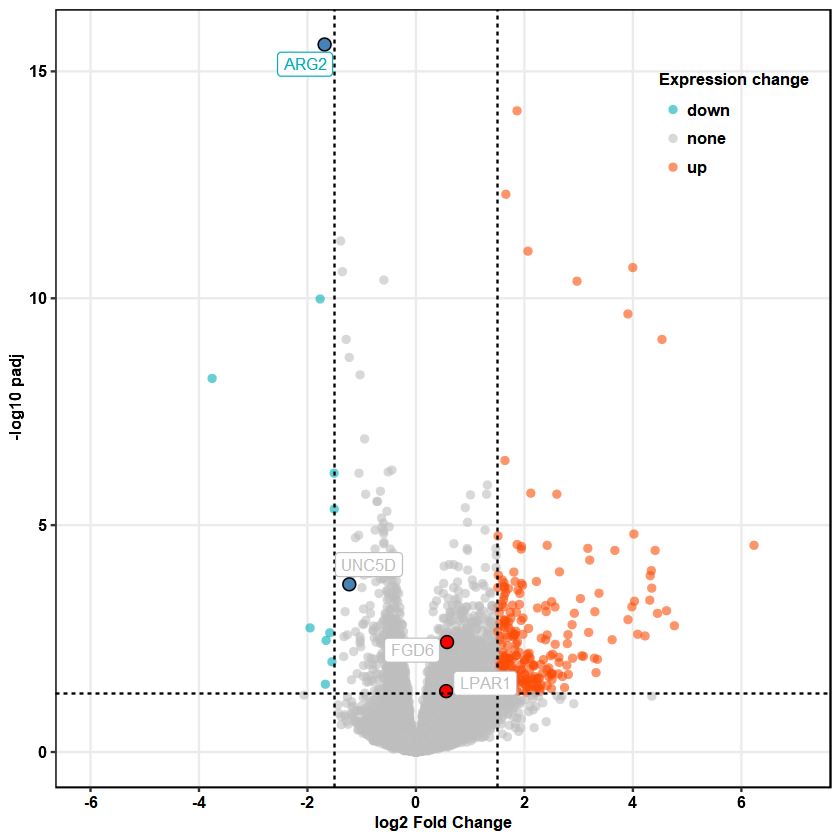

In [16]:
genes = c("ARG2","UNC5D","FGD6","LPAR1")
sig_genes = gene_name_DEG[gene_name_DEG$SYMBOL %in% genes, ]
up_genes = gene_name_DEG[gene_name_DEG$SYMBOL %in% c("FGD6","LPAR1") ,]
down_genes = gene_name_DEG[gene_name_DEG$SYMBOL %in% c("ARG2","UNC5D") ,]

ggplot(data = DEG, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point(aes(color = sig), alpha = 0.6, shape = 16, size = 2) +  
  geom_point(data = up_genes, shape = 21, size = 3, fill = "red", colour = "black") +
  geom_point(data = down_genes, shape = 21, size = 3, fill = "steelblue", colour = "black") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") +
  geom_vline(xintercept = c(-1.5,1.5), linetype = "dashed") +
  geom_label_repel(data = sig_genes, aes(label = SYMBOL), size = 3.5,segment.color = "black", show.legend = FALSE) +
  scale_color_manual(values=c("#00afbb", "grey","#fc4e07"),limits = c('down', 'none', 'up')) +
  scale_x_continuous(breaks = c(seq(-6, 7, 2)), limits = c(-6, 7)) +
  labs(x = 'log2 Fold Change', y = '-log10 padj', colour = "Expression change") +  
  theme_bw() + 
  theme(panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        plot.background = element_blank(),
        axis.title = element_text(face = "bold", color = "black", size = 10),
        axis.text = element_text(color = "black", size = 9, face = "bold"),
        legend.background = element_blank(),
        legend.title = element_text(face = "bold", color = "black", size = 10),
        legend.text = element_text(face = "bold", color = "black", size = 9),
        legend.spacing.x = unit(0, "cm"),
        legend.position = c(0.88, 0.85))

#### Figure 3(b)

In [25]:
setwd("D:\\文档\\研二\\02 课题工作\\03 不同课题\\01 逆转基因对-T2D课题\\文档\\期刊\\expert systems with applications\\二审\\实验补充\\rawdata")
data_tpm = read.csv("GSE164416_exp.csv", header = T, row.names = 1)
# dim(data_tpm)
sig_genes = sig_genes[order(sig_genes$sig),]
data_tpm_gene = data_tpm[sig_genes$SYMBOL,]
data_tpm_gene = as.data.frame(t(data_tpm_gene))
data_tpm_gene$group = c(rep("T2D", 39), rep("ND", 18))

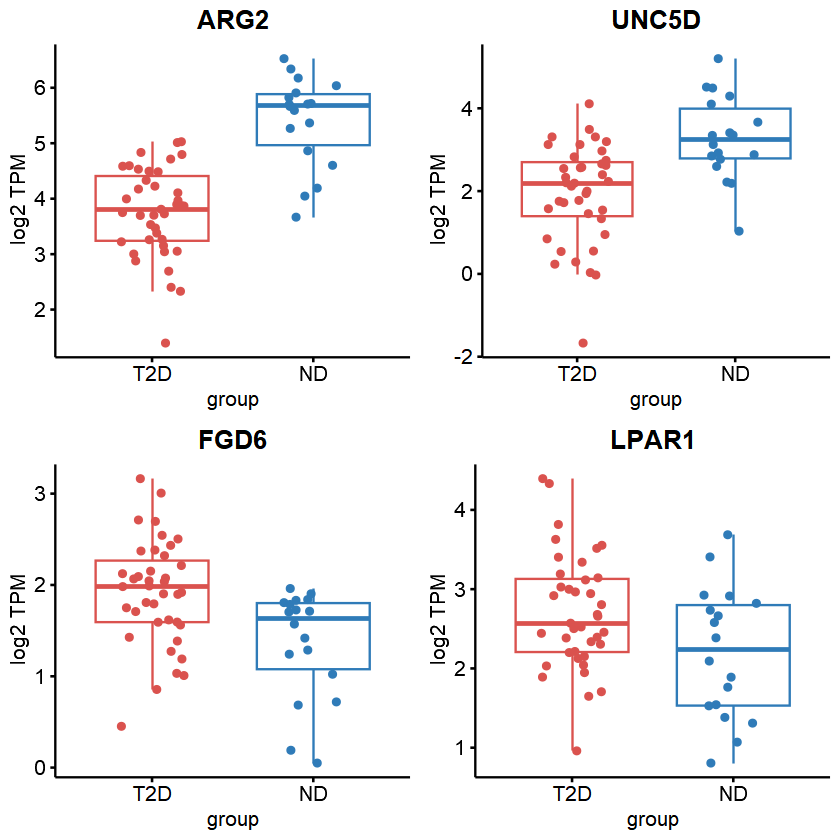

In [26]:
p = list()
for (i in 1:4) {
  gene = colnames(data_tpm_gene[i])
  temp = data_tpm_gene[,c(i,5)]
  temp[,1] = log2(temp[,1])
  p[[i]] = ggboxplot(temp, x = "group", y = gene, add = "jitter", color = "group",  palette = c("#da524e", "#2f7bb8"), ylab = "log2 TPM", xlab = "group", title = gene) +
    theme(plot.title = element_text(hjust = 0.5,size=15,face="bold"))+
    theme(legend.position = "NA")
  }
plot_grid(p[[1]], p[[2]] , p[[3]] , p[[4]] , ncol = 2)